# Assignment 7 Solution
This assignment is collaborated by Jingting Dai and Hongjie Guan. Hongjie finished A07.1 and Jingting finished A07.2.

## A07.1 - Correlation MSTs

Task: Build MSTs from correlations and analyze them
+ from the correlation matrices, build the Minimum Spanning
Trees (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, ...) as an attribute to the
nodes and calculate the degrees
+ compare the MST degree distributions of the 1 hour, 1 minute,
Normal and One-Factor correlations

In [1]:
import numpy as np
import os
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['figure.figsize'] = (12, 6)

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'npy' in item:
            item_path = os.path.join(datasets_folder,item)
            item_full_name = item.split(".")[0]
            item = item_full_name.split("_",1)[1]
            print("dataset named "+item+" imported")
            d["{}".format(item)] = np.load(item_path)
    print("finish importing")
    return d

In [3]:
# import npy files
cormats = import_datasets(r'New Folder With Items')

dataset named gaussian_1m imported
dataset named onefactor_1h imported
dataset named gaussian_1h imported
dataset named onefactor_1m imported
dataset named 1h imported
dataset named 1m imported
finish importing


In [4]:
# import stocknames to form the ticker
with open(r'New Folder With Items/stocknames.txt') as f:
    lines = f.readlines()
    
tickers={}
for i in range(0,len(lines)):
    tickers[i]=lines[i].strip()
print("The stocknames are:")
print(tickers)

The stocknames are:
{0: 'AAPL', 1: 'ABBV', 2: 'ABT', 3: 'ACN', 4: 'AIG', 5: 'ALL', 6: 'AMGN', 7: 'AMZN', 8: 'APA', 9: 'APC', 10: 'AXP', 11: 'BA', 12: 'BAC', 13: 'BAX', 14: 'BIIB', 15: 'BK', 16: 'BMY', 17: 'C', 18: 'CAT', 19: 'CL', 20: 'CMCSA', 21: 'COF', 22: 'COP', 23: 'COST', 24: 'CSCO', 25: 'CVS', 26: 'CVX', 27: 'DD', 28: 'DIS', 29: 'DOW', 30: 'DVN', 31: 'EBAY', 32: 'EMC', 33: 'EMR', 34: 'EXC', 35: 'F', 36: 'FB', 37: 'FCX', 38: 'FDX', 39: 'FOXA', 40: 'GD', 41: 'GE', 42: 'GILD', 43: 'GM', 44: 'GOOG', 45: 'GS', 46: 'HAL', 47: 'HD', 48: 'HON', 49: 'HPQ', 50: 'IBM', 51: 'INTC', 52: 'JNJ', 53: 'JPM', 54: 'KO', 55: 'LLY', 56: 'LMT', 57: 'LOW', 58: 'MA', 59: 'MCD', 60: 'MDLZ', 61: 'MDT', 62: 'MET', 63: 'MMM', 64: 'MO', 65: 'MON', 66: 'MRK', 67: 'MS', 68: 'MSFT', 69: 'NKE', 70: 'NOV', 71: 'NSC', 72: 'ORCL', 73: 'OXY', 74: 'PEP', 75: 'PFE', 76: 'PG', 77: 'PM', 78: 'QCOM', 79: 'RTN', 80: 'SBUX', 81: 'SLB', 82: 'SO', 83: 'SPG', 84: 'T', 85: 'TGT', 86: 'TWX', 87: 'TXN', 88: 'UNH', 89: 'UNP', 90:

In [5]:
Eigenvalues = {}
Eigenvectors = {}
for name,matrix in cormats.items():
    eigenval,  eigenvec = np.linalg.eig(matrix)
    Eigenvalues[name] = eigenval
    Eigenvectors[name] = eigenvec
    
len(Eigenvalues)

6

In [6]:
distance_matrics={n : np.sqrt(2*(1-cormat)) for n,cormat in cormats.items()}
len(distance_matrics)

6

In [7]:
graphs = {}
for name,matrix in distance_matrics.items():
    # create graphs
    graphs[name]= nx.from_numpy_matrix(matrix)
    # set label for nodes in each graph
    nx.set_node_attributes(graphs[name], tickers, 'ticker')

In [8]:
MSTs = {n : nx.minimum_spanning_tree(g,'weight') for n,g in graphs.items()}

In [9]:
# check if 'ticker' is assigned correctly
print(nx.get_node_attributes(MSTs["1h"], 'ticker'))

{0: 'AAPL', 1: 'ABBV', 2: 'ABT', 3: 'ACN', 4: 'AIG', 5: 'ALL', 6: 'AMGN', 7: 'AMZN', 8: 'APA', 9: 'APC', 10: 'AXP', 11: 'BA', 12: 'BAC', 13: 'BAX', 14: 'BIIB', 15: 'BK', 16: 'BMY', 17: 'C', 18: 'CAT', 19: 'CL', 20: 'CMCSA', 21: 'COF', 22: 'COP', 23: 'COST', 24: 'CSCO', 25: 'CVS', 26: 'CVX', 27: 'DD', 28: 'DIS', 29: 'DOW', 30: 'DVN', 31: 'EBAY', 32: 'EMC', 33: 'EMR', 34: 'EXC', 35: 'F', 36: 'FB', 37: 'FCX', 38: 'FDX', 39: 'FOXA', 40: 'GD', 41: 'GE', 42: 'GILD', 43: 'GM', 44: 'GOOG', 45: 'GS', 46: 'HAL', 47: 'HD', 48: 'HON', 49: 'HPQ', 50: 'IBM', 51: 'INTC', 52: 'JNJ', 53: 'JPM', 54: 'KO', 55: 'LLY', 56: 'LMT', 57: 'LOW', 58: 'MA', 59: 'MCD', 60: 'MDLZ', 61: 'MDT', 62: 'MET', 63: 'MMM', 64: 'MO', 65: 'MON', 66: 'MRK', 67: 'MS', 68: 'MSFT', 69: 'NKE', 70: 'NOV', 71: 'NSC', 72: 'ORCL', 73: 'OXY', 74: 'PEP', 75: 'PFE', 76: 'PG', 77: 'PM', 78: 'QCOM', 79: 'RTN', 80: 'SBUX', 81: 'SLB', 82: 'SO', 83: 'SPG', 84: 'T', 85: 'TGT', 86: 'TWX', 87: 'TXN', 88: 'UNH', 89: 'UNP', 90: 'UPS', 91: 'USB', 9

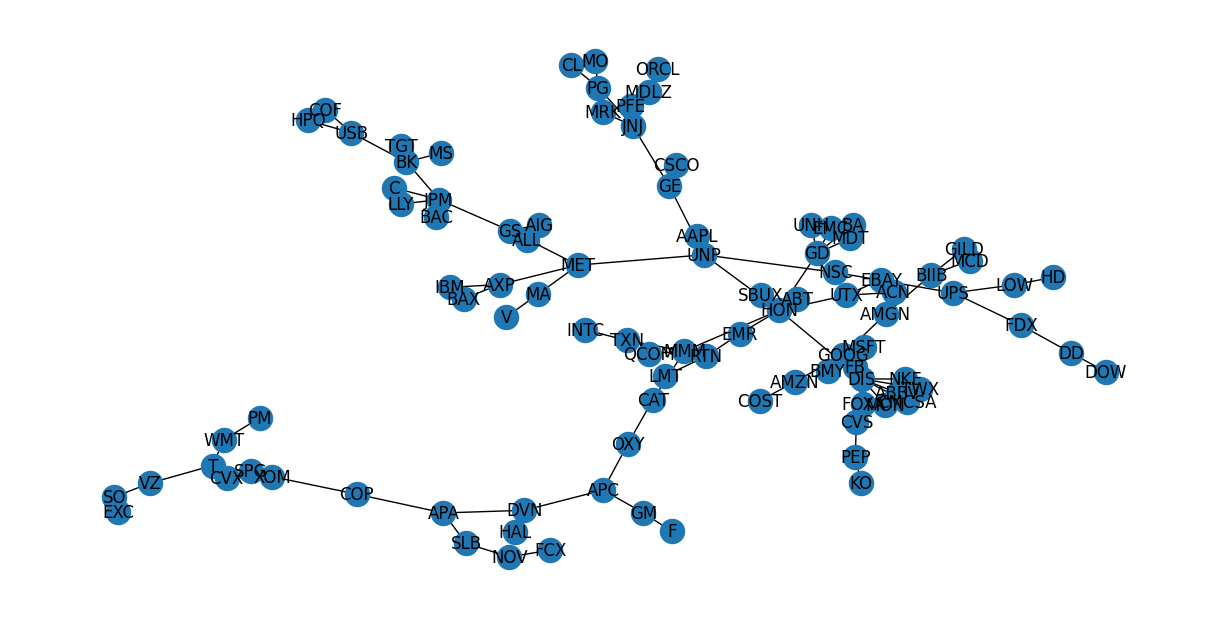

In [10]:
# to visualized the MNT of 1h
nx.draw(MSTs["1h"],with_labels=True, labels = nx.get_node_attributes(MSTs["1h"], 'ticker'))

In [11]:
# compute degree distribution
def compute_degree_distribution(graphs:dict)->dict:
    dd={}
    for k,v in graphs.items():
        degress = v.degree()
        dd[k]=[ degress[i] for i in v.nodes() ]
    return dd

In [12]:
degree_distributions=compute_degree_distribution(MSTs)
print("The degree distributions of each MSTs:\n")
print(degree_distributions)

The degree distributions of each MSTs:

{'gaussian_1m': [1, 1, 3, 4, 2, 1, 1, 1, 2, 5, 2, 1, 4, 1, 5, 2, 2, 1, 2, 1, 3, 1, 1, 1, 3, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 2, 1, 1, 3, 3, 2, 2, 7, 3, 1, 3, 3, 3, 2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 5, 1, 1, 2, 1, 1, 2], 'onefactor_1h': [1, 1, 2, 1, 2, 3, 2, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 10, 1, 1, 4, 1, 1, 1, 1, 6, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 37, 1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 4, 2, 1, 1, 1, 1, 1, 2], 'gaussian_1h': [4, 2, 1, 1, 1, 1, 4, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 3, 1, 1, 6, 2, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 1, 2, 3, 1, 2, 1, 2, 1, 3, 3, 2, 2, 3, 1, 5, 2, 2, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 1, 3, 3, 1, 2, 1, 1, 4, 1, 1, 1, 3, 4, 3, 3, 1], 'onefactor_1m': [1, 1, 1, 1, 1, 

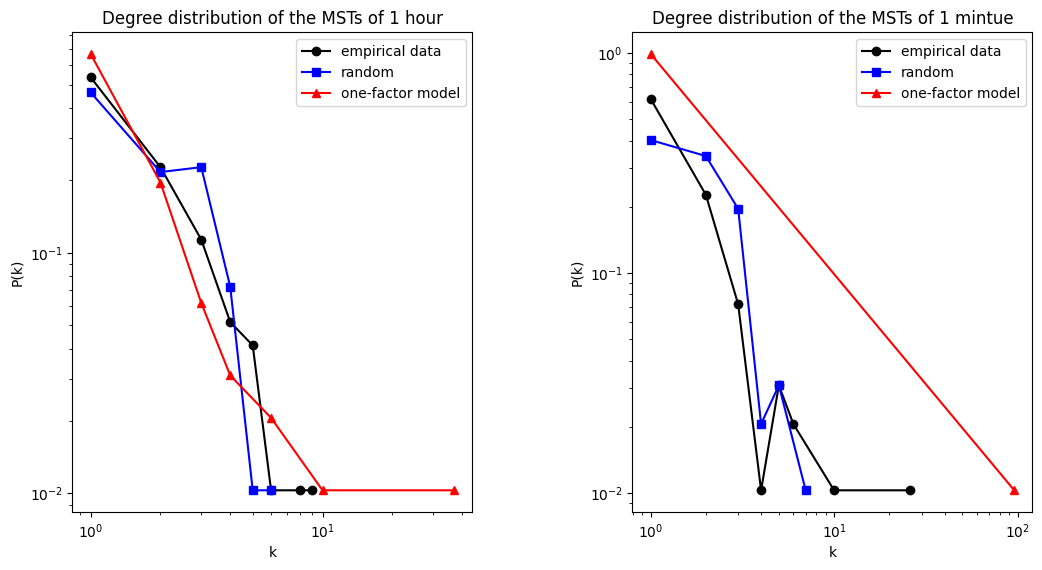

In [13]:
plt.subplot(1,2,1)

k_list_1h=degree_distributions['1h']
k_list_gaussian_1h=degree_distributions['gaussian_1h']
k_list_onefactor_1h=degree_distributions['onefactor_1h']

l=len(k_list_1h)

k_list_1h_unique = np.unique(np.array(degree_distributions['1h'])) 
k_list_gaussian_1h_unique = np.unique(np.array(degree_distributions['gaussian_1h']))
k_list_onefactor_1h_unique = np.unique(np.array(degree_distributions['onefactor_1h']))

P_k_1h = [k_list_1h.count(k)/l for k in k_list_1h_unique]
P_k_gaussian_1h = [k_list_gaussian_1h.count(k)/l for k in k_list_gaussian_1h_unique]
P_k_onefactor_1h = [k_list_onefactor_1h.count(k)/l for k in k_list_onefactor_1h_unique]

plt.plot(k_list_1h_unique, P_k_1h, 'o-',color='k',label="empirical data")
plt.plot(k_list_gaussian_1h_unique, P_k_gaussian_1h,'s-',color='b',label="random" )
plt.plot(k_list_onefactor_1h_unique, P_k_onefactor_1h,'^-',color='r',label="one-factor model" )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend(loc='best')
plt.title("Degree distribution of the MSTs of 1 hour")  

plt.subplot(1,2,2)
k_list_1m=degree_distributions['1m']
k_list_gaussian_1m=degree_distributions['gaussian_1m']
k_list_onefactor_1m=degree_distributions['onefactor_1m']

l=len(k_list_1m)

k_list_1m_unique = np.unique(np.array(degree_distributions['1m'])) 
k_list_gaussian_1m_unique = np.unique(np.array(degree_distributions['gaussian_1m']))
k_list_onefactor_1m_unique = np.unique(np.array(degree_distributions['onefactor_1m']))

P_k_1m = [k_list_1m.count(k)/l for k in k_list_1m_unique]
P_k_gaussian_1m = [k_list_gaussian_1m.count(k)/l for k in k_list_gaussian_1m_unique]
P_k_onefactor_1m = [k_list_onefactor_1m.count(k)/l for k in k_list_onefactor_1m_unique]

plt.plot(k_list_1m_unique, P_k_1m, 'o-',color='k',label="empirical data")
plt.plot(k_list_gaussian_1m_unique, P_k_gaussian_1m,'s-',color='b',label="random" )
plt.plot(k_list_onefactor_1m_unique, P_k_onefactor_1m,'^-',color='r',label="one-factor model" )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend(loc='best')
plt.title("Degree distribution of the MSTs of 1 mintue")  

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1)

plt.show()

## A07.2 - Conclusions

Task: finish the analysis by drawing conclusions 


### 1. Is there a ‘market mode’?

**Market mode is typically the largest eigenvalue $\lambda_1$ that is a lot larger than expected. of a financial network correlation matrices. As we can see from below sorted eigenvalues in descending order of 1 minute and 1 hour data, the largest eigenvalues are much more larger than other eigenvalues. So there exists market mode for both 1 minute and 1 hour.**

In [14]:
np.sort(Eigenvalues['1m'])[::-1]

array([30.15967999,  3.06441856,  2.69300287,  2.01853023,  1.87088218,
        1.61804659,  1.5286698 ,  1.44483891,  1.3705737 ,  1.21522435,
        1.20763077,  1.18148502,  1.13456249,  1.12095821,  1.09757579,
        1.04829675,  1.02094271,  0.99073481,  0.95252709,  0.94956666,
        0.92901798,  0.9060765 ,  0.89551127,  0.87128445,  0.85969399,
        0.84981126,  0.8242317 ,  0.81074884,  0.805316  ,  0.79908457,
        0.77242311,  0.7496294 ,  0.73472574,  0.72888706,  0.70444103,
        0.69964766,  0.68103054,  0.67564233,  0.66727062,  0.65497874,
        0.64891423,  0.6430286 ,  0.63714127,  0.63541305,  0.62493966,
        0.61306728,  0.5971473 ,  0.5802699 ,  0.57634413,  0.55863149,
        0.55703092,  0.54810024,  0.53873119,  0.53750456,  0.5248485 ,
        0.52075107,  0.51211442,  0.50706425,  0.49770436,  0.49066646,
        0.48091548,  0.47343326,  0.46372574,  0.457907  ,  0.4531241 ,
        0.44800767,  0.4419446 ,  0.43184792,  0.42448627,  0.41

In [15]:
np.sort(Eigenvalues['1h'])[::-1]

array([3.10278357e+01, 6.11462818e+00, 3.90762710e+00, 3.38341207e+00,
       3.29244496e+00, 2.72151599e+00, 2.48442167e+00, 2.33355883e+00,
       2.08467102e+00, 1.90042517e+00, 1.78149180e+00, 1.67893845e+00,
       1.54920798e+00, 1.51315768e+00, 1.39114035e+00, 1.28089150e+00,
       1.26239606e+00, 1.18971931e+00, 1.12630673e+00, 1.08744639e+00,
       1.03529794e+00, 9.89977946e-01, 9.58606917e-01, 9.15589513e-01,
       8.68960156e-01, 8.50254263e-01, 7.92407534e-01, 7.71291141e-01,
       7.36828468e-01, 7.05923023e-01, 6.74072270e-01, 6.32130296e-01,
       6.05902486e-01, 5.72376717e-01, 5.61119174e-01, 5.22957580e-01,
       5.16337739e-01, 4.97981478e-01, 4.79414479e-01, 4.56641482e-01,
       4.40709127e-01, 4.29785965e-01, 4.15268348e-01, 3.88825844e-01,
       3.75706258e-01, 3.70619833e-01, 3.59691965e-01, 3.45398785e-01,
       3.29092969e-01, 3.18825500e-01, 3.02578385e-01, 2.81592137e-01,
       2.63001216e-01, 2.56798749e-01, 2.54752222e-01, 2.47836340e-01,
      

### 2. Which are the 5 stocks with highest degree on the 1 minute and 1 hour MST?

**The top 7 stocks with highest degree on 1 minute are ['HON':26, 'EMR':10, 'COP':6, 'JPM':6, 'COF':5, 'DIS':5, 'GD':5], with some of the stocks have same degree.**
**The top 7 stocks with highest degree on 1 minute are ['DIS':9, 'HON':8, 'GOOG':6, 'GD':5, 'JNJ':5, 'JPM':5, 'UNP':5], with some of the stocks have same degree.**

In [16]:
sorted(MSTs["1m"].degree, key=lambda x: x[1], reverse=True)

[(48, 26),
 (33, 10),
 (22, 6),
 (53, 6),
 (21, 5),
 (28, 5),
 (40, 5),
 (66, 4),
 (6, 3),
 (16, 3),
 (27, 3),
 (36, 3),
 (52, 3),
 (62, 3),
 (95, 3),
 (4, 2),
 (11, 2),
 (17, 2),
 (20, 2),
 (26, 2),
 (44, 2),
 (50, 2),
 (51, 2),
 (58, 2),
 (61, 2),
 (64, 2),
 (70, 2),
 (74, 2),
 (76, 2),
 (78, 2),
 (81, 2),
 (82, 2),
 (84, 2),
 (87, 2),
 (89, 2),
 (91, 2),
 (96, 2),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (5, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (18, 1),
 (19, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (34, 1),
 (35, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (49, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (59, 1),
 (60, 1),
 (63, 1),
 (65, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (75, 1),
 (77, 1),
 (79, 1),
 (80, 1),
 (83, 1),
 (85, 1),
 (86, 1),
 (88, 1),
 (90, 1),
 (92, 1),
 (93, 1),
 (94, 1)]

In [17]:
sorted(MSTs["1h"].degree, key=lambda x: x[1], reverse=True)

[(28, 9),
 (48, 8),
 (44, 6),
 (40, 5),
 (52, 5),
 (53, 5),
 (89, 5),
 (15, 4),
 (45, 4),
 (62, 4),
 (63, 4),
 (96, 4),
 (8, 3),
 (9, 3),
 (10, 3),
 (14, 3),
 (30, 3),
 (41, 3),
 (76, 3),
 (84, 3),
 (90, 3),
 (91, 3),
 (92, 3),
 (6, 2),
 (7, 2),
 (18, 2),
 (22, 2),
 (25, 2),
 (27, 2),
 (33, 2),
 (38, 2),
 (43, 2),
 (57, 2),
 (58, 2),
 (60, 2),
 (70, 2),
 (71, 2),
 (73, 2),
 (74, 2),
 (79, 2),
 (81, 2),
 (82, 2),
 (87, 2),
 (94, 2),
 (95, 2),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (16, 1),
 (17, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (23, 1),
 (24, 1),
 (26, 1),
 (29, 1),
 (31, 1),
 (32, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (39, 1),
 (42, 1),
 (46, 1),
 (47, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (59, 1),
 (61, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (72, 1),
 (75, 1),
 (77, 1),
 (78, 1),
 (80, 1),
 (83, 1),
 (85, 1),
 (86, 1),
 (88, 1),
 (93, 1)]

In [18]:
top5_1m = [48, 33, 22, 53, 21, 28, 40]

In [19]:
top5_1h = [28, 48, 44, 40, 52, 53, 89]

In [20]:
top5_1m_stock = []
for i in top5_1m:
    top5_1m_stock.append(nx.get_node_attributes(MSTs["1m"], 'ticker')[i])

In [21]:
top5_1h_stock = []
for i in top5_1h:
    top5_1h_stock.append(nx.get_node_attributes(MSTs["1h"], 'ticker')[i])

In [22]:
top5_1m_stock

['HON', 'EMR', 'COP', 'JPM', 'COF', 'DIS', 'GD']

In [23]:
top5_1h_stock

['DIS', 'HON', 'GOOG', 'GD', 'JNJ', 'JPM', 'UNP']

### 3. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?

**From the emperical degree distribution plot of Q1, the degree distribution of MSTs are *not* qualitatively the same at 1 minute and 1 hour**

### 4. Is the degree distribution of MSTs well reproduced by the null Gaussian and One-Factor models?

**From the same plot of Q1, both 1 minute and 1 hour degree distribution of MSTs are well reproduced by the null Gaussian models. 1 hour one factor model degree distribution of MSTs behaves well before k =10, but shows very small degree probability density at higher degrees, which do not exist in emperical data. 1 minute one factor model shows much higher degree probability density throughout the range of degrees.**